In [1]:
#Task 2-Linear Regression

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
# Replace 'housing.csv' with the actual filename if different
df = pd.read_csv("C:/Users/DHANA SRI/Downloads/house price data.csv")
df.head

<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  con

In [65]:
# Checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [81]:
# Checking null values and duplicates
df.isnull().sum()
df.duplicated().sum()


0

In [82]:
# Removing nulls and duplicate rows
df = df.dropna()
df = df.drop_duplicates()

In [83]:
# Dropping unwanted columns
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

In [84]:
# Converting categorical to numeric if any
df = pd.get_dummies(df, drop_first=True)

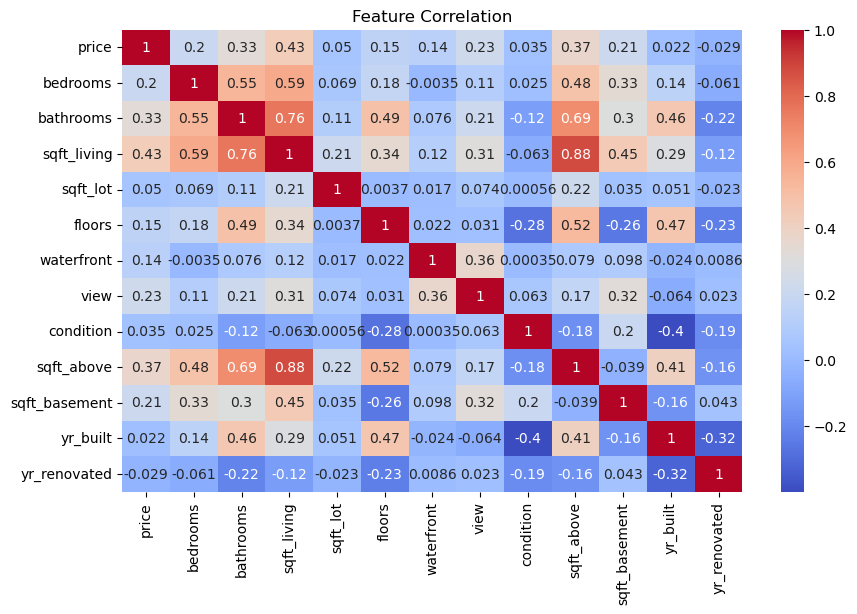

In [85]:
# Checking correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [86]:
# Splitting features and target
X = df.drop('price', axis=1)
y = df['price']

In [87]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Making predictions
y_pred = model.predict(X_test)

In [90]:
# Checking accuracy
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [91]:
print("R² Score:", round(r2, 2))
print("Mean Absolute Error:", round(mae, 2))
print("Mean Squared Error:", round(mse, 2))

R² Score: 0.03
Mean Absolute Error: 210908.17
Mean Squared Error: 986921767056.1


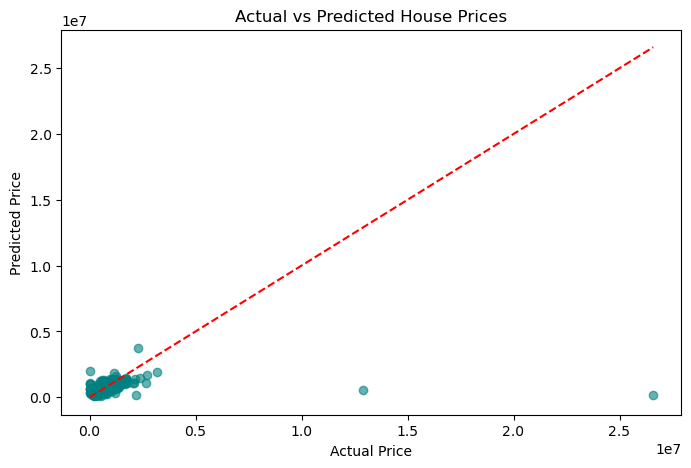

In [92]:
# Visualizing predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()